In [16]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [17]:


import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns


In [18]:
"""Created a function to choose wether or not person is sick based on their Predicted output(it is a float, sometimes can vary, and I had to do this instead of round() 
, because ocasionally a value of 2 would appear) I tried to implement a sigmoid function, but that went completely wrong, definitely misused it there"""
def choose(a):
    if abs(a) <0.5:
        return 0
    else:
        return 1

In [19]:
ds_train=pd.read_csv("/home/huntrese/Documents/COding/Sigmoid/diabetes.csv")

"""Using ds_train.describe() here I realised some cells have value 0, when they clearly should not do so, because of this .isnull() showed 0, 
even though the data was not correct, as someone can not have a Blood Pressure of 0, so I tried using SimpleImputer and KNeighbor Inputer, out of which SimpleIMputer performed
best, so I sticked with it further on. The only concern was wether or not insulin can be 0, but some googling led me to believe that it is not possible,so it has also been 
modified using the SimpleImputer
""" 
imputer = SimpleImputer(missing_values=0,strategy='mean')
ds_train.iloc[:,1:6]=imputer.fit_transform(ds_train.iloc[:,1:6])



In [20]:
"""The data looks good, no minimal values of 0 where they should not be"""
ds_train.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
"""Here I prepared the dataset in order to begin training the model"""
y=ds_train['Outcome']
X=ds_train.copy()
X.pop('Outcome')
X.shape
noise=np.random.uniform(-3,3,X.shape)
X=3*X+noise
print(X)


     Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0      20.947730  445.897098     215.641144     107.282891  468.519060   
1       1.577564  257.475892     199.772729      89.045396  466.093124   
2      21.722686  550.174349     189.519780      87.596271  466.451989   
3       4.131501  268.554021     195.419150      70.485262  281.789543   
4      -1.141087  411.091573     120.626040     103.666987  506.897725   
..           ...         ...            ...            ...         ...   
763    30.627769  304.564658     226.643246     141.537725  541.103583   
764     6.526825  366.650823     210.838669      82.091962  467.000547   
765    13.992232  363.415328     213.089216      70.515630  337.270651   
766     3.860728  380.419738     180.384431      84.757113  469.449674   
767     4.088158  278.442382     208.834913      90.346410  464.598333   

            BMI  DiabetesPedigreeFunction         Age  
0    103.218622                  3.902623  150.078425  

In [22]:
"""I split the Dataset from above into 2 batches, one for training and another for testing, trained the model, and then started a prediction on the testing dataset"""
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_pred = [choose(x) for x in y_pred]


In [23]:
"""Calculated the error"""
meansqr=mean_squared_error(y_pred, y_test)
meanabs=mean_absolute_error(y_pred, y_test)
print("The mean squared error is:",meansqr)
print("The mean absolute error is:",meanabs)


The mean squared error is: 0.2435064935064935
The mean absolute error is: 0.2435064935064935


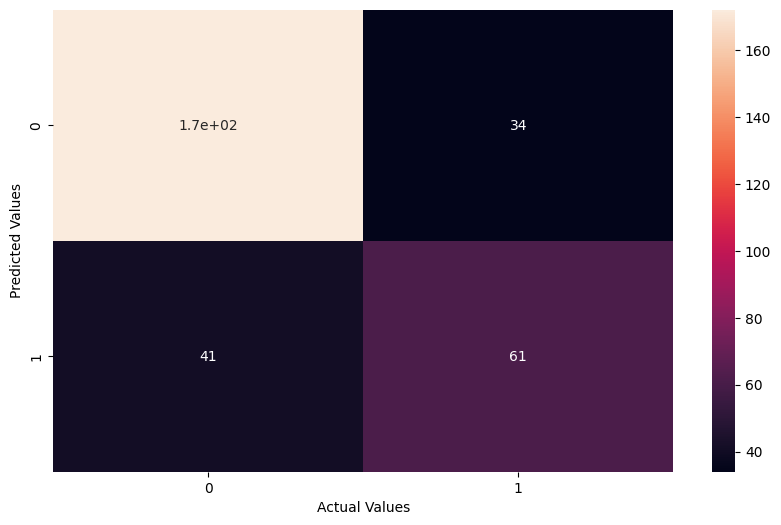

The accuracy score of the prediction is: 0.7564935064935064


In [24]:
"""Made a plot using confusion matrix to better visualise the output, and used accuracy_score() to check how accurate the prediction is"""
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
score=accuracy_score(y_test,y_pred)
print("The accuracy score of the prediction is:",score)



The accuracy score of the prediction is: 0.7669270833333334


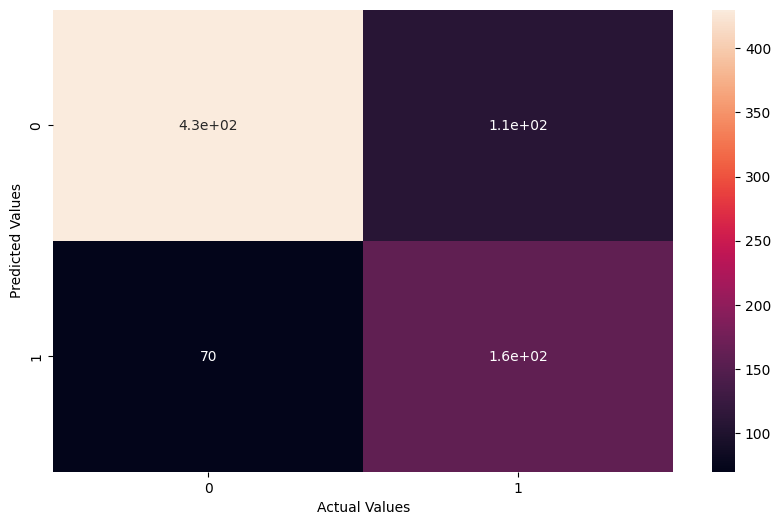

In [25]:
"""Here I decided to run the model once on the entire dataset, see how it would fare with all the information"""
y=ds_train['Outcome']
X=ds_train.copy()
X.pop('Outcome')
X.shape
noise=np.random.uniform(-3,3,X.shape)
X=3*X+noise
prediction=lr.predict(X)
prediction = [choose(x) for x in prediction]


cm=confusion_matrix(prediction,y)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')



score=accuracy_score(y,prediction)
print("The accuracy score of the prediction is:",score)





In [28]:
"""Next I decided to make a way to predict wether or not a person is Diabetic using manual input"""
test=ds_train.sample()
test.pop('Outcome')
for i in test:
    test[i]=float(input(test[i].name))
result=choose(lr.predict(3*test+np.random.randint(-3,3)))
x="Sick" if result==1 else "Healthy"
print("based on the data, the person is: ",x)
print(result)

based on the data, the person is:  Sick
1


In conclusion, My initial assumption that the values of 0 are indeed missing and not the actual recorded value proved to be true, as testing has shown an increase of 1-2% accuraccy. I have spent a while trying to make the accuracy higher, modifying values here and there, but unless I try implementing a different model I do not see any way to greatly increase the performance here. I have debated on using PCA to simplify the function, but decided against it, as I did not want to commit any data loss if possible, even if it was minor. I am not entierly sure how good an accuracy score of 75% realistically is, however I definitely look forward to finding out new ways of increasing this accuracy to higher heights. I think this was a great learning opportunity and has given me a clear understanding of the basic functionality of sklearn and other libraries and how I can use it to make predictions. 